In [1]:
%reset
import shelve
# 데이터를 불러와서 green channel 의 peak 만 더 해본다
# Peak 를 우선 검출하자.
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import numpy as np
import pandas as pd
import scipy
import peakutils
import cv2

import dlib
# 파일 네임 찾아주는 부분
from os import listdir
from os.path import isfile, join


In [2]:
# you have to adjust your local path (mypath) where you want to import a recording video onto python's working space.
# and you also have to change below filename (filename_clue).
mypath        = 'C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs'
filename_clue = 'outpy2018_06_07' #outpy2018_05_17_13_47_44.out

file_lists1  = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_lists2  = [mypath+'/'+f for f in file_lists1 if f[0:15] == filename_clue ]
file_lists3  = [f for f in file_lists2 if f[-1] == 't' ]

file_lists   = file_lists3
del(file_lists1, file_lists2, file_lists3)
print(len(file_lists))
# 데이터 불러오는 부분
filename = file_lists[4][0:len(file_lists[0])-4]; print(filename)

my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

del(filename, key, my_shelf)
print('done!')
% whos

6
C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs/outpy2018_06_07_01_45_04.out
done!
Variable             Type                          Data/Info
------------------------------------------------------------
FF                   type                          <class 'plotly.tools.FigureFactory'>
cv2                  module                        <module 'cv2.cv2' from 'C<...>\cv2.cp36-win_amd64.pyd'>
dlib                 module                        <module 'dlib' from 'C:\\<...>dlib.cp36-win_amd64.pyd'>
download_plotlyjs    function                      <function download_plotly<...>js at 0x000001DD793CEAE8>
file_lists           list                          n=6
filename_clue        str                           outpy2018_06_07
go                   module                        <module 'plotly.graph_obj<...>graph_objs\\__init__.py'>
imgs                 list                          n=231
init_notebook_mode   function                      <function init_notebook_m<...>de at 0x0

In [3]:
hog_face_detector = dlib.get_frontal_face_detector()
cnn_face_detector = dlib.cnn_face_detection_model_v1('C:/Users/ChungkiLee/Documents/GitHub/dlib-models/mmod_human_face_detector.dat') #mmod_human_face_detector.dat.bz2

mpx = 1; mg = 50; imgRect = [];
def imgRects(imgs):
    imgRect = []
    for i in range(len(imgs)):
        tmp    = np.array(imgs)[i]
        gray   = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        gray   = cv2.pyrDown( gray ); tmp = cv2.pyrDown( tmp );
#         gray   = cv2.pyrDown( gray ); tmp = cv2.pyrDown( tmp );
        f_rect = hog_face_detector(gray, 0)
        tmpRGB = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        
        f_rectcnn = hog_face_detector(tmpRGB, 1)
#         for rect in f_rect:
        for rect in f_rectcnn:    
            x, y = rect.left()*mpx-mg, rect.top()*mpx-mg
            w, h = (rect.right()*mpx - x + mg), (rect.bottom()*mpx - y + mg)
#             imgRect = tmp[y:y+h, x:x+w, :]
#             print( np.min(tmp[y:y+w, x:x+w].shape[0:2] ))
            awh = np.min( tmp[y:y+w, x:x+w].shape[0:2] )
#             print('tmp size is:',tmp.shape,'  -->  x,t,w,h:  ',[x,y,w,h],' --> ',tmp[y:y+w, x:x+w, :].shape, ' --> ', tmp[y:y+awh, x:x+awh, :].shape)
            imgRect.append(tmp[y:y+awh, x:x+awh, :]) # w, h 를 정사각형으로 만든다.
        if i % (len(imgs)//10) == 0:
            print('f_rect: ',f_rect, ' f_rect_cnn: ', f_rectcnn)
            print('The percentage of iteration is ', (i*100)//len(imgs),' % done. --> w: ',w,' x h: ',h)
            print('tmp size is:',tmp.shape,'  -->  x,t,w,h:  ',[x,y,w,h],' --> ',tmp[y:y+w, x:x+w, :].shape, ' --> ', tmp[y:y+awh, x:x+awh, :].shape)
    return imgRect

imgRect = imgRects(imgs)
print(np.array(imgs).shape)
print(np.array(imgRect).shape)

import matplotlib.pyplot as plt
imgRect_tmp = cv2.cvtColor(np.array(imgRect)[1], cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(np.array(imgRect_tmp))
plt.show()
np.array(imgRect)[0].shape

f_rect:  rectangles[[(245, 162) (369, 286)]]  f_rect_cnn:  rectangles[[(239, 153) (368, 282)]]
The percentage of iteration is  0  % done. --> w:  229  x h:  229
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [189, 103, 229, 229]  -->  (229, 229, 3)  -->  (229, 229, 3)
f_rect:  rectangles[[(245, 162) (369, 286)]]  f_rect_cnn:  rectangles[[(239, 153) (368, 282)]]
The percentage of iteration is  9  % done. --> w:  229  x h:  229
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [189, 103, 229, 229]  -->  (229, 229, 3)  -->  (229, 229, 3)
f_rect:  rectangles[[(245, 162) (369, 286)]]  f_rect_cnn:  rectangles[[(239, 153) (368, 282)]]
The percentage of iteration is  19  % done. --> w:  229  x h:  229
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [189, 103, 229, 229]  -->  (229, 229, 3)  -->  (229, 229, 3)
f_rect:  rectangles[[(245, 162) (369, 286)]]  f_rect_cnn:  rectangles[[(239, 153) (368, 282)]]
The percentage of iteration is  29  % done. --> w:  229  x h:  229
tmp size is: (360, 640, 3)   -->  x,

<Figure size 640x480 with 1 Axes>

(229, 229, 3)

extracted image size is :  (229, 229, 3)
resizing image is :  (100, 100, 3)


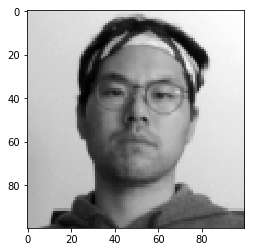

rectangles[[(26, 26) (78, 78)]]
The size of out_face is:  (100, 100, 3)


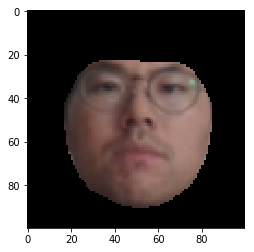

The masking iteration is done! A array size is :  (231, 100, 100, 3)
The second iteration is done! A unmasking array size is :  (231, 100, 100, 3)


In [4]:
from imutils import face_utils
import imutils
import numpy as np
import collections
import dlib
import cv2
from utils import extract_left_eye_center, extract_right_eye_center, get_rotation_matrix, crop_image
from imutils.face_utils import FaceAligner
import scipy.signal as ss

def face_remap(shape):
    remapped_image = cv2.convexHull(shape)
    return remapped_image

def face_alignment(image, gray, rects):
    for (i, rect) in enumerate(rects):
        faceAligned = aligner.align(image, gray, rect)
#         print(faceAligned.shape)
    return faceAligned

# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector  = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs/shape_predictor_68_face_landmarks.dat') # have to adjst your local path for "shape_predictor_68_face_landmarks.dat"
aligner   = FaceAligner(predictor, desiredFaceWidth = 100)
def face_masking(rects, faceAligned):
    out_face = np.zeros_like(faceAligned)
    for (i, rect) in enumerate(rects):    
        shape = predictor(faceAligned, rect)
        #initialize mask array
        remapped_shape = np.zeros_like(shape) 
        feature_mask = np.zeros((faceAligned.shape[0], faceAligned.shape[1])) #, dtype=numpy.float64   
        # we extract the face    
        shape = face_utils.shape_to_np(shape)
        remapped_shape = face_remap(shape)
        cv2.fillConvexPoly(feature_mask, remapped_shape[0:27], 1)
        feature_mask = feature_mask.astype(np.bool)
        out_face[feature_mask] = faceAligned[feature_mask]
    return out_face    
    
# load the input image, resize it, and convert it to grayscale
image = np.array(imgRect)[45]
print('extracted image size is : ',image.shape)
image = imutils.resize(image, width=100)
print('resizing image is : ',image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(1)
plt.imshow(np.array(gray), cmap='gray')
plt.show()

# detect faces in the grayscale image
rects = detector(gray, 1) # 뒤에 붙는 상수는?
print(rects)

faceAligned = face_alignment(image, gray, rects)    
rects       = detector(faceAligned, 1) # 뒤에 붙는 상수는?
out_face    = face_masking(rects, faceAligned)

print('The size of out_face is: ',out_face.shape)
plt.figure(1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(out_face, cv2.COLOR_BGR2RGB))
plt.show()    

# tmp = cv2.GaussianBlur(tmp,(5,5),0)

# print(np.array(imgRect).shape[0])
face_Resized_out   = [];
face_Aligned_out   = [];
face_masking_out   = [];
face_unmasking_out = [];
face_Rected_out    = [];
for i in range(np.array(imgRect).shape[0]):
    tmp         = np.array(imgRect)[i]
    
    face_Rected_out.append(tmp)
    
    tmp         = imutils.resize(tmp, width=100)
    tmp         = cv2.GaussianBlur(tmp,(5,5),0)
    gray        = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
    rects       = detector(gray, 1)    # 뒤에 붙는 상수는?
    faceAligned = face_alignment(tmp, gray, rects)    
    rects       = detector(faceAligned, 1)   # 뒤에 붙는 상수는?
    out_face    = face_masking(rects, faceAligned)
    
    face_Resized_out.append(tmp)
    
    bw2d = np.outer(ss.kaiser(100, 14), np.ones(100))
    bw2d = np.sqrt(bw2d * bw2d.T)
    bw2d = cv2.merge((bw2d,bw2d,bw2d))
    
    out_face  = out_face.astype('float64')
    tmp       = tmp.astype('float64')
    out_face *= bw2d
    tmp      *= bw2d
    
    face_Aligned_out.append(faceAligned)
    face_masking_out.append(out_face)
    face_unmasking_out.append(tmp)
    
print('The masking iteration is done! A array size is : ',np.array(face_masking_out).shape)
print('The second iteration is done! A unmasking array size is : ',np.array(face_unmasking_out).shape)

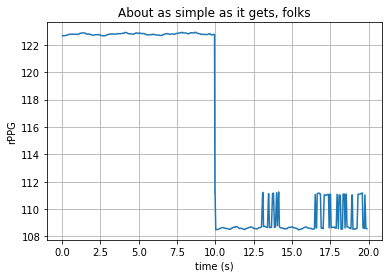

In [5]:
# masking과 normalization이 완료되었기 때문에, 이제 Heart signal을 추출해보자.

def heart_signal_extractor(face_masking_out):
    mG = np.zeros(len(face_masking_out));
    for i in range(len(face_masking_out)):
        tmp = np.array(face_masking_out)[i]
        mGt = np.mean(tmp[:, :, 1])
#         print(mGt)
        mG[i]=mGt
    return mG

mG   = heart_signal_extractor(face_masking_out)
mGun = heart_signal_extractor(face_unmasking_out)
mGag = heart_signal_extractor(face_Aligned_out)
mGrs = heart_signal_extractor(face_Resized_out)
mGre = heart_signal_extractor(face_Rected_out)

time_x1 = [x + time_x[-1] for x in time_x] 
time_x0 = np.hstack((time_x, time_x1))
mGrsag = np.hstack((mGre, mGag))
# print(np.array(mGrsag).shape)
plt.plot(time_x0, mGrsag)
plt.xlabel('time (s)')
plt.ylabel('rPPG')
plt.title('About as simple as it gets, folks')
plt.grid(True)
# plt.savefig("test.png")
plt.show()

#아래 이미지를 보면 10초동안 측정가능한 심박동이 영상으로부터 잘 나타난다.

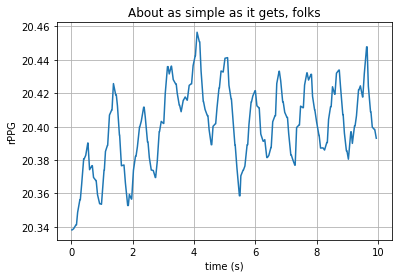

In [6]:
# 이제는 pytorch를 이용해서 training을 진행해보자.
plt.plot(time_x, mGun)
plt.xlabel('time (s)')
plt.ylabel('rPPG')
plt.title('About as simple as it gets, folks')
plt.grid(True)
# plt.savefig("test.png")
plt.show()

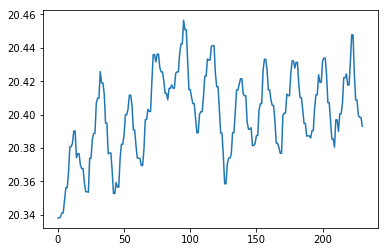

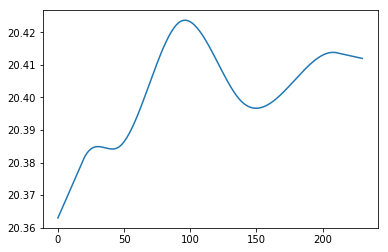

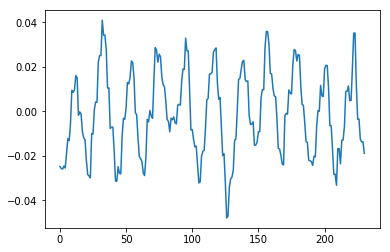

In [7]:
from seasonal import fit_seasons, adjust_seasons
import math

# detrend and deseasonalize
seasons, trend = fit_seasons(mGun)
adjusted = adjust_seasons(mGun, seasons=seasons)
residual = mGun - trend

# visualize results
plt.figure()
plt.plot(mGun, label='data')

plt.figure()
plt.plot(trend, label='trend')

plt.figure()
plt.plot(residual, label='residual')
# plt.legend(loc='upper left')

(100, 100, 3) uint8
(100, 100, 3) float64


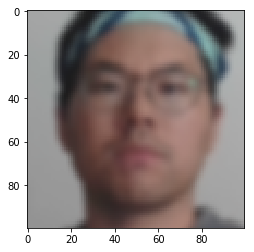

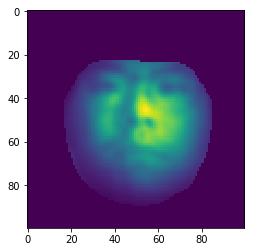

In [8]:
#처음 NN에 입력으로 들어갈 사진은 align되고 resizing된 image임 --> input size: 
#1차 필터는 신호를 preprocess하는 spatical filter를 만든다.

numb = 0
tmp1 = np.array(face_Aligned_out)[numb]
tmp2 = np.array(face_masking_out)[numb]
tmp  = np.concatenate((tmp1, tmp2), axis = 1)
print(tmp1.shape, tmp1.dtype)
print(tmp2.shape, tmp2.dtype)

plt.figure(1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(tmp1, cv2.COLOR_BGR2RGB))
plt.show() 
plt.figure(2)
# plt.axis("off")
plt.imshow(tmp2[:, :, 0])
plt.show() 

bins:  [-50 -40 -30 -20 -10   0  10  20  30  40  50]
quantizating bins:  [ 1  1  1  1  1  2  2  4  5  7  8  9 10 10  8  6  4  3  2  1  1  1  1  2  3
  4  5  6  7  8  9 10 10 10 10  9  8  7  6  4  3  2  1  1  1  1  2  3  4  5
  7  8  9 10 10 10  9  7  5  3  2  1  1  1  1  2  3  4  5  6  7  8  9 10 10
 10 10 10  9  8  7  5  4  3  1  1  1  2  4  5  7  8  9 10 10 10 10  9  7  6
  5  3  2  1  1  1  1  1  2  3  4  6  7  8 10 10 10 10  9  8  7  6  5  3  2
  1  1  1  1  1  2  3  3  4  6  7  8  9 10 10 10 10  9  7  4  2  1  1  1  2
  3  4  6  7  9 10 10 10 10 10  9  8  7  6  4  3  1  1  1  1  3  4  6  7  9
  9 10 10 10 10 10  9  8  7  6  4  3  3  2  1  1  1  1  2  3  4  6  8  9 10
 10 10  9  7  6  4  2  1  1  1  1  1  2  2  4  5  6  7  8  9 10 10 10 10  8
  7  5  3  2  1  2]


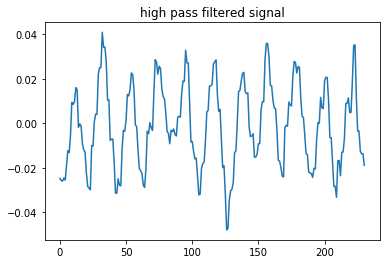

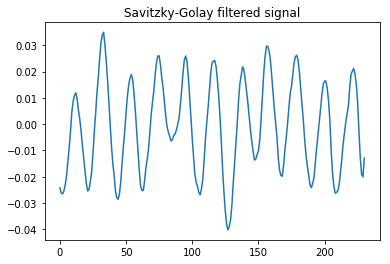

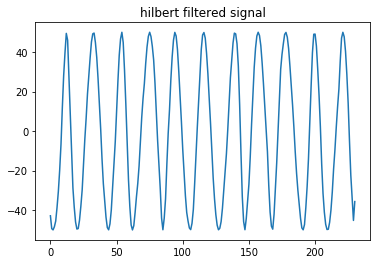

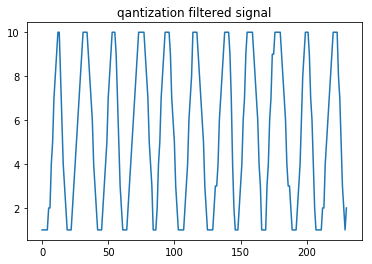

In [9]:
# 1. CNN으로 신호를 필터링하는 network을 구성해보자
# 2. CNN으로 RGB layer를 time series로 변경하고 peak를 detection하는 network을 구성해보자


from scipy.signal import savgol_filter, hilbert
residual.dtype
residual2 = savgol_filter(residual, 11, 3)
residual3 = hilbert(residual2)
inst_amplitude = np.abs(residual3) #envelope extraction
inst_phase = np.unwrap(np.angle(residual3))#inst phase
#Regenerate the carrier from the instantaneous phase
residual4 = np.cos(inst_phase)*50
plt.figure()
plt.plot(residual, label='residual')
plt.title('high pass filtered signal')

plt.figure()
plt.plot(residual2, label='residual2')
plt.title('Savitzky-Golay filtered signal')

plt.figure()
plt.plot(residual4, label='residual4')
plt.title('hilbert filtered signal')
# https://www.gaussianwaves.com/2017/04/extracting-instantaneous-amplitude-phase-frequency-hilbert-transform/

residual4 = np.array(residual4)
bins = np.array(range(-50, 51, 10))
print('bins: ', bins)
residual5 = np.digitize(residual4, bins, right=True)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html
plt.figure()
plt.plot(residual5, label='residual5')
plt.title('qantization filtered signal')
print('quantizating bins: ', residual5)


In [10]:
face_Aligned_out_tr = face_Aligned_out
residual5_tr        = residual5

In [11]:
mypath        = 'C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs'
filename_clue = 'outpy2018_06_07' #outpy2018_05_17_13_47_44.out

file_lists1  = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_lists2  = [mypath+'/'+f for f in file_lists1 if f[0:15] == filename_clue ]
file_lists3  = [f for f in file_lists2 if f[-1] == 't' ]

file_lists   = file_lists3
del(file_lists1, file_lists2, file_lists3)
print(len(file_lists))
# 데이터 불러오는 부분
filename = file_lists[5][0:len(file_lists[0])-4]; print(filename)

my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

del(filename, key, my_shelf)
print('done!')
% whos

6
C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs/outpy2018_06_07_01_45_42.out
done!
Variable                   Type                           Data/Info
-------------------------------------------------------------------
FF                         type                           <class 'plotly.tools.FigureFactory'>
FaceAligner                type                           <class 'imutils.face_util<...>facealigner.FaceAligner'>
adjust_seasons             function                       <function adjust_seasons at 0x000001DD257E92F0>
adjusted                   ndarray                        231: 231 elems, type `float64`, 1848 bytes
aligner                    FaceAligner                    <imutils.face_utils.facea<...>ct at 0x000001DD0B64F7F0>
bins                       ndarray                        11: 11 elems, type `int32`, 44 bytes
bw2d                       ndarray                        100x100x3: 30000 elems, type `float64`, 240000 bytes (234.375 kb)
cnn_face_detector     

f_rect:  rectangles[[(245, 148) (369, 272)]]  f_rect_cnn:  rectangles[[(259, 163) (366, 271)]]
The percentage of iteration is  0  % done. --> w:  207  x h:  208
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [209, 113, 207, 208]  -->  (207, 207, 3)  -->  (207, 207, 3)
f_rect:  rectangles[[(245, 148) (369, 272)]]  f_rect_cnn:  rectangles[[(259, 163) (366, 271)]]
The percentage of iteration is  9  % done. --> w:  207  x h:  208
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [209, 113, 207, 208]  -->  (207, 207, 3)  -->  (207, 207, 3)
f_rect:  rectangles[[(245, 148) (369, 272)]]  f_rect_cnn:  rectangles[[(259, 163) (366, 271)]]
The percentage of iteration is  19  % done. --> w:  207  x h:  208
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [209, 113, 207, 208]  -->  (207, 207, 3)  -->  (207, 207, 3)
f_rect:  rectangles[[(245, 148) (369, 272)]]  f_rect_cnn:  rectangles[[(259, 163) (366, 271)]]
The percentage of iteration is  29  % done. --> w:  207  x h:  208
tmp size is: (360, 640, 3)   -->  x,

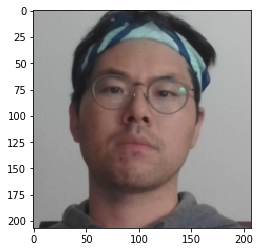

(207, 207, 3)

In [12]:
hog_face_detector = dlib.get_frontal_face_detector()
cnn_face_detector = dlib.cnn_face_detection_model_v1('C:/Users/ChungkiLee/Documents/GitHub/dlib-models/mmod_human_face_detector.dat') #mmod_human_face_detector.dat.bz2

mpx = 1; mg = 50; imgRect = [];
def imgRects(imgs):
    imgRect = []
    for i in range(len(imgs)):
        tmp    = np.array(imgs)[i]
        gray   = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        gray   = cv2.pyrDown( gray ); tmp = cv2.pyrDown( tmp );
#         gray   = cv2.pyrDown( gray ); tmp = cv2.pyrDown( tmp );
        f_rect = hog_face_detector(gray, 0)
        tmpRGB = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        
        f_rectcnn = hog_face_detector(tmpRGB, 1)
#         for rect in f_rect:
        for rect in f_rectcnn:    
            x, y = rect.left()*mpx-mg, rect.top()*mpx-mg
            w, h = (rect.right()*mpx - x + mg), (rect.bottom()*mpx - y + mg)
#             imgRect = tmp[y:y+h, x:x+w, :]
#             print( np.min(tmp[y:y+w, x:x+w].shape[0:2] ))
            awh = np.min( tmp[y:y+w, x:x+w].shape[0:2] )
#             print('tmp size is:',tmp.shape,'  -->  x,t,w,h:  ',[x,y,w,h],' --> ',tmp[y:y+w, x:x+w, :].shape, ' --> ', tmp[y:y+awh, x:x+awh, :].shape)
            imgRect.append(tmp[y:y+awh, x:x+awh, :]) # w, h 를 정사각형으로 만든다.
        if i % (len(imgs)//10) == 0:
            print('f_rect: ',f_rect, ' f_rect_cnn: ', f_rectcnn)
            print('The percentage of iteration is ', (i*100)//len(imgs),' % done. --> w: ',w,' x h: ',h)
            print('tmp size is:',tmp.shape,'  -->  x,t,w,h:  ',[x,y,w,h],' --> ',tmp[y:y+w, x:x+w, :].shape, ' --> ', tmp[y:y+awh, x:x+awh, :].shape)
    return imgRect

imgRect = imgRects(imgs)
print(np.array(imgs).shape)
print(np.array(imgRect).shape)

import matplotlib.pyplot as plt
imgRect_tmp = cv2.cvtColor(np.array(imgRect)[1], cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(np.array(imgRect_tmp))
plt.show()
np.array(imgRect)[0].shape

extracted image size is :  (207, 207, 3)
resizing image is :  (100, 100, 3)


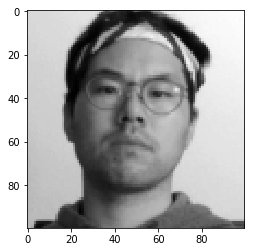

rectangles[[(17, 18) (80, 80)]]
The size of out_face is:  (100, 100, 3)


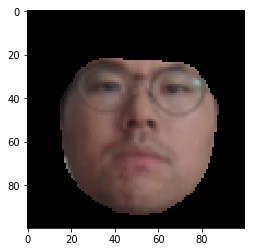

The masking iteration is done! A array size is :  (221, 100, 100, 3)
The second iteration is done! A unmasking array size is :  (221, 100, 100, 3)


In [13]:
from imutils import face_utils
import imutils
import numpy as np
import collections
import dlib
import cv2
from utils import extract_left_eye_center, extract_right_eye_center, get_rotation_matrix, crop_image
from imutils.face_utils import FaceAligner
import scipy.signal as ss

def face_remap(shape):
    remapped_image = cv2.convexHull(shape)
    return remapped_image

def face_alignment(image, gray, rects):
    for (i, rect) in enumerate(rects):
        faceAligned = aligner.align(image, gray, rect)
#         print(faceAligned.shape)
    return faceAligned

# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector  = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs/shape_predictor_68_face_landmarks.dat') # have to adjst your local path for "shape_predictor_68_face_landmarks.dat"
aligner   = FaceAligner(predictor, desiredFaceWidth = 100)
def face_masking(rects, faceAligned):
    out_face = np.zeros_like(faceAligned)
    for (i, rect) in enumerate(rects):    
        shape = predictor(faceAligned, rect)
        #initialize mask array
        remapped_shape = np.zeros_like(shape) 
        feature_mask = np.zeros((faceAligned.shape[0], faceAligned.shape[1])) #, dtype=numpy.float64   
        # we extract the face    
        shape = face_utils.shape_to_np(shape)
        remapped_shape = face_remap(shape)
        cv2.fillConvexPoly(feature_mask, remapped_shape[0:27], 1)
        feature_mask = feature_mask.astype(np.bool)
        out_face[feature_mask] = faceAligned[feature_mask]
    return out_face    
    
# load the input image, resize it, and convert it to grayscale
image = np.array(imgRect)[45]
print('extracted image size is : ',image.shape)
image = imutils.resize(image, width=100)
print('resizing image is : ',image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(1)
plt.imshow(np.array(gray), cmap='gray')
plt.show()

# detect faces in the grayscale image
rects = detector(gray, 1) # 뒤에 붙는 상수는?
print(rects)

faceAligned = face_alignment(image, gray, rects)    
rects       = detector(faceAligned, 1) # 뒤에 붙는 상수는?
out_face    = face_masking(rects, faceAligned)

print('The size of out_face is: ',out_face.shape)
plt.figure(1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(out_face, cv2.COLOR_BGR2RGB))
plt.show()    

# tmp = cv2.GaussianBlur(tmp,(5,5),0)

# print(np.array(imgRect).shape[0])
face_Resized_out   = [];
face_Aligned_out   = [];
face_masking_out   = [];
face_unmasking_out = [];
face_Rected_out    = [];
for i in range(np.array(imgRect).shape[0]):
    tmp         = np.array(imgRect)[i]
    
    face_Rected_out.append(tmp)
    
    tmp         = imutils.resize(tmp, width=100)
    tmp         = cv2.GaussianBlur(tmp,(5,5),0)
    gray        = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
    rects       = detector(gray, 1)    # 뒤에 붙는 상수는?
    faceAligned = face_alignment(tmp, gray, rects)    
    rects       = detector(faceAligned, 1)   # 뒤에 붙는 상수는?
    out_face    = face_masking(rects, faceAligned)
    
    face_Resized_out.append(tmp)
    
    bw2d = np.outer(ss.kaiser(100, 14), np.ones(100))
    bw2d = np.sqrt(bw2d * bw2d.T)
    bw2d = cv2.merge((bw2d,bw2d,bw2d))
    
    out_face  = out_face.astype('float64')
    tmp       = tmp.astype('float64')
    out_face *= bw2d
    tmp      *= bw2d
    
    face_Aligned_out.append(faceAligned)
    face_masking_out.append(out_face)
    face_unmasking_out.append(tmp)
    
print('The masking iteration is done! A array size is : ',np.array(face_masking_out).shape)
print('The second iteration is done! A unmasking array size is : ',np.array(face_unmasking_out).shape)

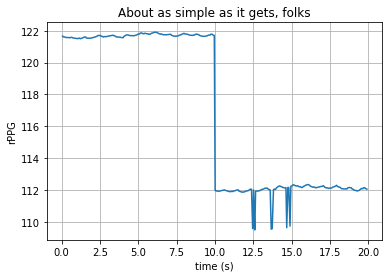

In [14]:
# masking과 normalization이 완료되었기 때문에, 이제 Heart signal을 추출해보자.

def heart_signal_extractor(face_masking_out):
    mG = np.zeros(len(face_masking_out));
    for i in range(len(face_masking_out)):
        tmp = np.array(face_masking_out)[i]
        mGt = np.mean(tmp[:, :, 1])
#         print(mGt)
        mG[i]=mGt
    return mG

mG   = heart_signal_extractor(face_masking_out)
mGun = heart_signal_extractor(face_unmasking_out)
mGag = heart_signal_extractor(face_Aligned_out)
mGrs = heart_signal_extractor(face_Resized_out)
mGre = heart_signal_extractor(face_Rected_out)

time_x1 = [x + time_x[-1] for x in time_x] 
time_x0 = np.hstack((time_x, time_x1))
mGrsag = np.hstack((mGre, mGag))
# print(np.array(mGrsag).shape)
plt.plot(time_x0, mGrsag)
plt.xlabel('time (s)')
plt.ylabel('rPPG')
plt.title('About as simple as it gets, folks')
plt.grid(True)
# plt.savefig("test.png")
plt.show()

#아래 이미지를 보면 10초동안 측정가능한 심박동이 영상으로부터 잘 나타난다.

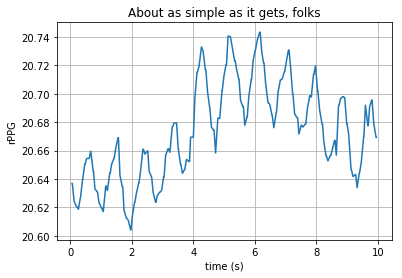

In [15]:
# 이제는 pytorch를 이용해서 training을 진행해보자.
plt.plot(time_x, mGun)
plt.xlabel('time (s)')
plt.ylabel('rPPG')
plt.title('About as simple as it gets, folks')
plt.grid(True)
# plt.savefig("test.png")
plt.show()

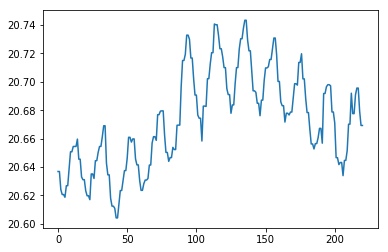

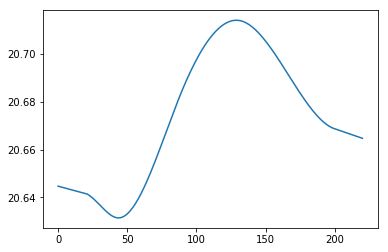

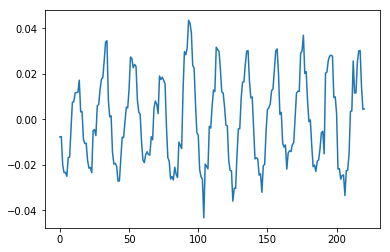

In [16]:
from seasonal import fit_seasons, adjust_seasons
import math

# detrend and deseasonalize
seasons, trend = fit_seasons(mGun)
adjusted = adjust_seasons(mGun, seasons=seasons)
residual = mGun - trend

# visualize results
plt.figure()
plt.plot(mGun, label='data')

plt.figure()
plt.plot(trend, label='trend')

plt.figure()
plt.plot(residual, label='residual')
# plt.legend(loc='upper left')

(100, 100, 3) uint8
(100, 100, 3) float64


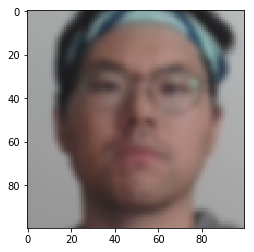

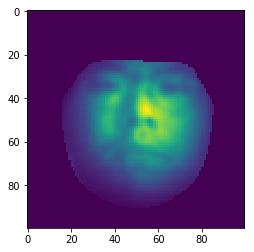

In [17]:
#처음 NN에 입력으로 들어갈 사진은 align되고 resizing된 image임 --> input size: 
#1차 필터는 신호를 preprocess하는 spatical filter를 만든다.

numb = 0
tmp1 = np.array(face_Aligned_out)[numb]
tmp2 = np.array(face_masking_out)[numb]
tmp  = np.concatenate((tmp1, tmp2), axis = 1)
print(tmp1.shape, tmp1.dtype)
print(tmp2.shape, tmp2.dtype)

plt.figure(1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(tmp1, cv2.COLOR_BGR2RGB))
plt.show() 
plt.figure(2)
# plt.axis("off")
plt.imshow(tmp2[:, :, 0])
plt.show() 

bins:  [-50 -40 -30 -20 -10   0  10  20  30  40  50]
quantizating bins:  [ 5  3  2  1  1  1  1  3  4  6  8  9 10 10  9  8  6  4  3  1  1  1  1  1  2
  4  5  6  7  8  9 10 10 10 10  8  7  5  3  2  1  1  1  1  2  3  4  5  7  8
  9 10 10 10 10  9  8  6  5  3  2  1  1  1  1  2  3  4  5  7  8  9 10 10 10
  9  7  5  3  2  1  1  1  1  1  2  3  4  5  7  8  9 10 10 10 10  9  8  7  5
  4  2  1  1  1  1  1  2  4  5  6  8  9 10 10 10 10  9  8  6  5  4  3  2  1
  1  1  1  2  4  5  7  8 10 10 10 10  9  8  6  5  3  2  1  1  1  1  1  2  4
  5  6  7  9 10 10 10 10  9  8  6  4  2  1  1  1  1  2  3  4  5  7  8  9 10
 10 10 10  9  7  6  4  3  2  1  1  1  1  2  3  5  6  8  9 10 10 10  9  8  6
  5  4  2  1  1  1  1  1  2  4  5  7  8  9 10 10 10 10  9  8  6]


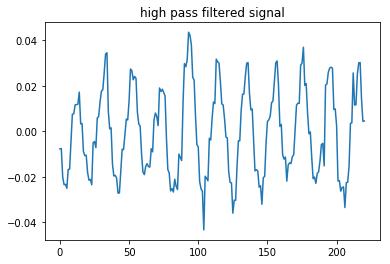

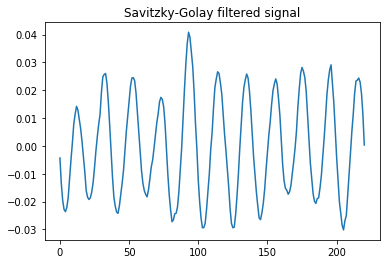

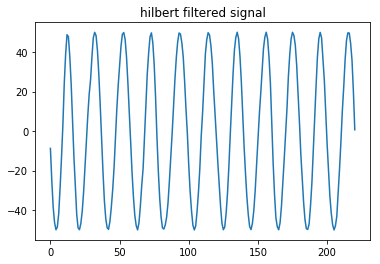

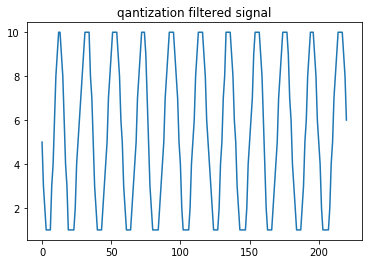

In [18]:
from scipy.signal import savgol_filter, hilbert
residual.dtype
residual2 = savgol_filter(residual, 11, 3)
residual3 = hilbert(residual2)
inst_amplitude = np.abs(residual3) #envelope extraction
inst_phase = np.unwrap(np.angle(residual3))#inst phase
#Regenerate the carrier from the instantaneous phase
residual4 = np.cos(inst_phase)*50
plt.figure()
plt.plot(residual, label='residual')
plt.title('high pass filtered signal')

plt.figure()
plt.plot(residual2, label='residual2')
plt.title('Savitzky-Golay filtered signal')

plt.figure()
plt.plot(residual4, label='residual4')
plt.title('hilbert filtered signal')
# https://www.gaussianwaves.com/2017/04/extracting-instantaneous-amplitude-phase-frequency-hilbert-transform/

residual4 = np.array(residual4)
bins = np.array(range(-50, 51, 10))
print('bins: ', bins)
residual5 = np.digitize(residual4, bins, right=True)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html
plt.figure()
plt.plot(residual5, label='residual5')
plt.title('qantization filtered signal')
print('quantizating bins: ', residual5)


In [19]:
# face_Aligned_out_tr = face_Aligned_out
# residual5_tr        = residual5
face_Aligned_out_te = face_Aligned_out
residual5_te        = residual5

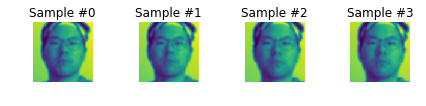

(tensor([[[ 0.6471,  0.6471,  0.6471,  ...,  0.7176,  0.7176,  0.7176],
         [ 0.6471,  0.6471,  0.6471,  ...,  0.7176,  0.7176,  0.7176],
         [ 0.6471,  0.6471,  0.6471,  ...,  0.7137,  0.7176,  0.7176],
         ...,
         [ 0.5725,  0.5765,  0.5765,  ...,  0.5490,  0.5765,  0.6000],
         [ 0.5725,  0.5765,  0.5765,  ...,  0.5020,  0.5333,  0.5647],
         [ 0.5725,  0.5765,  0.5765,  ...,  0.4510,  0.4863,  0.5255]],

        [[ 0.6471,  0.6471,  0.6471,  ...,  0.7176,  0.7176,  0.7176],
         [ 0.6471,  0.6471,  0.6471,  ...,  0.7176,  0.7176,  0.7176],
         [ 0.6471,  0.6471,  0.6471,  ...,  0.7176,  0.7176,  0.7176],
         ...,
         [ 0.5725,  0.5765,  0.5765,  ...,  0.5490,  0.5725,  0.6000],
         [ 0.5725,  0.5765,  0.5765,  ...,  0.4941,  0.5294,  0.5647],
         [ 0.5725,  0.5765,  0.5765,  ...,  0.4392,  0.4745,  0.5176]],

        [[ 0.6431,  0.6431,  0.6431,  ...,  0.7098,  0.7098,  0.7098],
         [ 0.6431,  0.6431,  0.6431,  ...,  

In [162]:
import os

# third-party library
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms, utils
from skimage import io, transform
from torch.utils.data.dataset import Dataset

import numpy as np
import torch.optim as optim
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 100
LR = 0.001              # learning rate


class FaceLabelDataset(Dataset):

    def __init__(self, labelings, facedatas, transform=None):
        # Transforms
        self.to_tensor = transforms.ToTensor()
        self.labelings = labelings#.astype('uint8')
        self.facedatas = facedatas
        self.transform = transform

    def __len__(self):
        return len(self.labelings)

    def __getitem__(self, idx):
        images = self.facedatas[idx]
        labels = self.labelings[idx]
        img_ts = self.to_tensor(images)
        lbg_ts = labels

        return (img_ts, lbg_ts)
    

face_dataset = FaceLabelDataset(labelings=residual5_tr-1,
                                facedatas=np.array(face_Aligned_out_tr))
face_testset = FaceLabelDataset(labelings=residual5_te-1,
                                facedatas=np.array(face_Aligned_out_te))
# 검증하는 코드 -----------------------------------------------
fig = plt.figure()
for i in range(len(face_dataset)):
    sample, labeling = face_dataset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample[1, :, :])
    
    if i == 3:
        plt.show()
        break
# 검증하는 코드 -----------------------------------------------
train_loader = Data.DataLoader(dataset=face_dataset, batch_size=BATCH_SIZE, shuffle=True)#, num_workers=1)
print(face_dataset[0])
print(face_dataset.__getitem__(0)[0].size(), face_dataset.__len__())
print(face_dataset.__getitem__(0)[1].shape)
test_loader = Data.DataLoader(dataset=face_testset, batch_size=BATCH_SIZE, shuffle=True)#, num_workers=1)

# test_x = Variable(torch.unsqueeze(torch.IntTensor(np.array(face_Aligned_out_te)), dim=1)).type(torch.FloatTensor)/255. 
face_te = np.array(face_Aligned_out_te)
face_te = face_te.transpose((0, 3, 1, 2))
test_x = Variable(torch.IntTensor(face_te)).type(torch.FloatTensor)/255.   
test_y = torch.LongTensor(residual5_te-1)
print(face_testset.__getitem__(0)[0].size(), face_testset.__len__())
print(face_testset.__getitem__(0)[1].shape)
print(test_x.size())

In [21]:
print(np.zeros(10))
labeling = np.zeros(10)
labeling[1] = 1
print(labeling)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


In [158]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=3,              # input height
                out_channels=10,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (48, 14, 14)
            nn.Conv2d(10, 20, 5, 1, 2),     # output shape (96, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (96, 7, 7)
        )
        self.out = nn.Linear(20 * 25 * 25, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization


cnn = CNN()
print(cnn)  # net architecture
# RuntimeError: Given groups=1, weight[96, 48, 5, 5], so expected input[50, 16, 50, 50] to have 48 channels, but got 16 channels instead

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=12500, out_features=10, bias=True)
)


In [159]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()

C:\Users\ChungkiLee\AppData\Local\conda\conda\envs\r\lib\site-packages\ipykernel_launcher.py:25: UserWarning:

invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Epoch:  0 | train loss: 2.1513 | test accuracy: 0.00


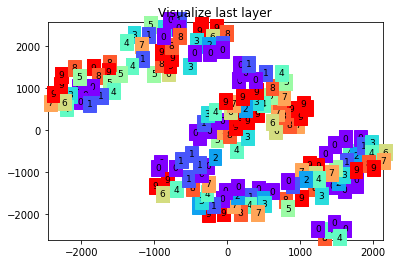

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] prediction number
[4 2 1 0 0 0 0 2 3 5 7 8 9 9 8 7 5 3 2 0 0 0 0 0 1] real number


In [163]:
# training and testing
for epoch in range(EPOCH):
    for step, [x, y] in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y
        output = cnn(b_x)[0]               # cnn output
#         print(output[0], b_y[0] )
#         print(output.size(), b_y.size() )
#         print(output.dtype, b_y.dtype )
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:25])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:25].numpy(), 'real number')